### Install dependencies

In [2]:
!pip install boto3 sagemaker

Defaulting to user installation because normal site-packages is not writeable


### Setup

1. Create a new endpoint at https://us-east-2.console.aws.amazon.com/sagemaker/home?region=us-east-2#/endpoints then set `ENDPOINT` to it's name.
2. You can do inference in a single file or in a entire folder, set the path to it using `INPUT_PATH`

In [2]:
ENDPOINT = "your_endpoint_name"

# local file or folder
INPUT_PATH = "./examples/velothes/"
# INPUT_PATH = "./drones.jpg"

### Run inference

Now that we have set the paths, we will run the images thuru amazon sagemaker's endpoint.

Note: This assumes you have created the endpoint and a IAM access been configured.

In [3]:
import os
import glob
import json
import boto3
import sagemaker

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)
    
# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))

    # sagemaker request raw response
    # print('sagemaker response:\n\n', result, '\n')

    # inference response
    print('file: {} inference response:\n{}\n'.format(
        fpath,
        json.dumps(json.loads(result['Body'].read().decode()), sort_keys=True, indent=4))
    )

Processing: 47 files...
file: ./examples/velothes/00146 (1).jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.7208524942398071,
                "det_bbox": [
                    0.631892740726471,
                    0.6275806427001953,
                    0.8046770095825195,
                    0.8477875590324402
                ],
                "label": "bicycle",
                "scan": "global"
            }
        ]
    }
}

file: ./examples/velothes/00291.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9732071757316589,
                "det_bbox": [
                    0.45692119002342224,
                    0.5306485891342163,
                    0.5569551587104797,
                    0.8202528953552246
                ],
                "label": "bicycle",
                "scan": "glo

file: ./examples/velothes/00100 (1).jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9233776330947876,
                "det_bbox": [
                    0.8586397767066956,
                    0.5620676279067993,
                    0.9973666667938232,
                    0.9004662036895752
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.8195903301239014,
                "det_bbox": [
                    0.6672077775001526,
                    0.5396633744239807,
                    0.692147433757782,
                    0.6324102282524109
                ],
                "label": "bicycle",
                "scan": "global"
            }
        ]
    }
}

file: ./examples/velothes/00106 (2).jpg inference response:
{
    "input.jpg": {
        "detections": [
 

file: ./examples/velothes/00007.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9187242984771729,
                "det_bbox": [
                    0.1305454820394516,
                    0.2998771667480469,
                    0.2835434079170227,
                    0.6063013076782227
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.9097016453742981,
                "det_bbox": [
                    0.0028863102197647095,
                    0.318329781293869,
                    0.09642620384693146,
                    0.6981666088104248
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.8923028707504272,
                "det_bbox": [


file: ./examples/velothes/00143.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9752210974693298,
                "det_bbox": [
                    0.7364163398742676,
                    0.7314081788063049,
                    0.9887174963951111,
                    0.9962234497070312
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.9600646495819092,
                "det_bbox": [
                    0.4935534596443176,
                    0.7056846022605896,
                    0.6180924773216248,
                    0.9918950796127319
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.931598424911499,
                "det_bbox": [
    

file: ./examples/velothes/00009.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9920022487640381,
                "det_bbox": [
                    0.33258354663848877,
                    0.41159218549728394,
                    0.5179615020751953,
                    0.9585739970207214
                ],
                "label": "bicycle",
                "scan": "global"
            }
        ]
    }
}

file: ./examples/velothes/00130 (1).jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.6391432881355286,
                "det_bbox": [
                    0.29892751574516296,
                    0.5870997905731201,
                    0.33364221453666687,
                    0.6978780031204224
                ],
                "label": "bicycle",
                "scan": "global"
            },


file: ./examples/velothes/00020.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9489691257476807,
                "det_bbox": [
                    0.23996612429618835,
                    0.3796267509460449,
                    0.3726752698421478,
                    0.7778890132904053
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.8174811601638794,
                "det_bbox": [
                    0.6440930962562561,
                    0.31897109746932983,
                    0.6944935321807861,
                    0.5183300971984863
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.8152946829795837,
                "det_bbox": [
 

file: ./examples/velothes/00163.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 2,
                "confidence": 0.9559386372566223,
                "det_bbox": [
                    0.7227568030357361,
                    0.7077443599700928,
                    0.9633617401123047,
                    0.9963088631629944
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.6788983345031738,
                "det_bbox": [
                    0.3041989505290985,
                    0.5476098656654358,
                    0.3668587803840637,
                    0.7912473678588867
                ],
                "label": "bicycle",
                "scan": "global"
            },
            {
                "classid": 2,
                "confidence": 0.45152485370635986,
                "det_bbox": [
  

## Run inference and draw

In this example we will draw the bounding boxes into the images

This requires OpenCV2 and matplotlib

In [4]:
%matplotlib inline

Processing: 47 files...


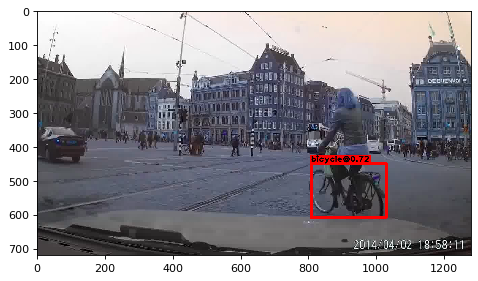

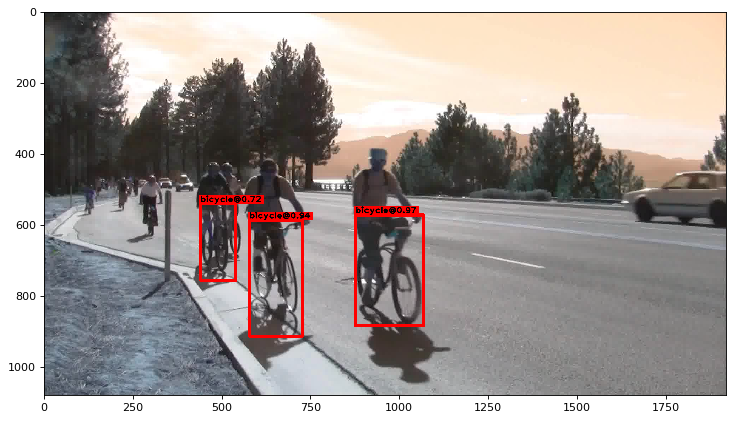

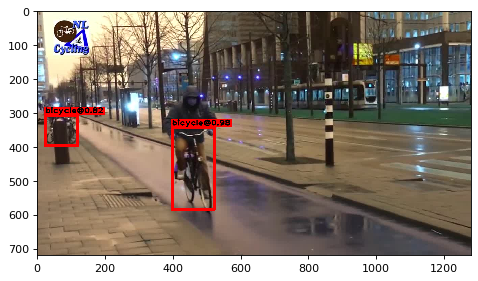

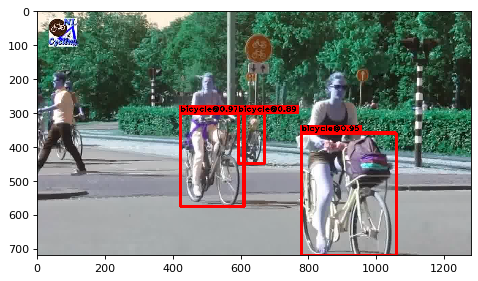

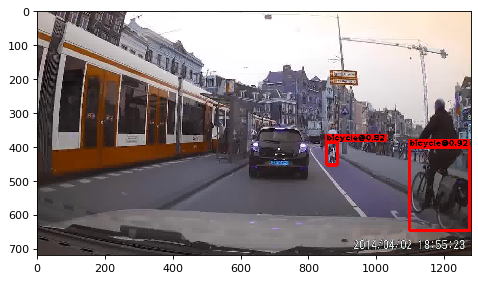

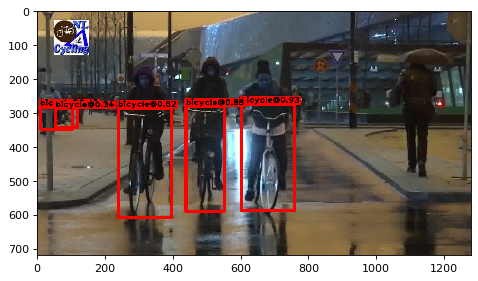

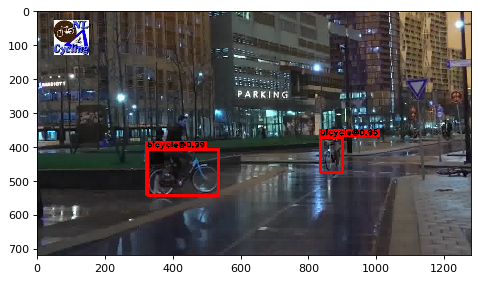

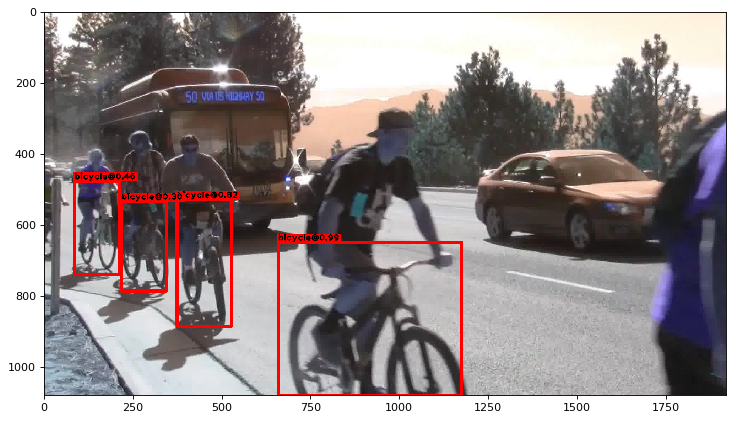

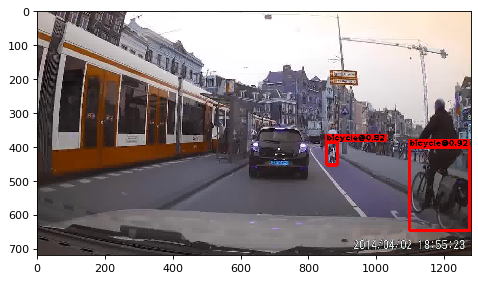

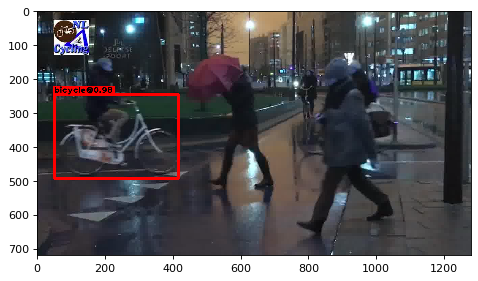

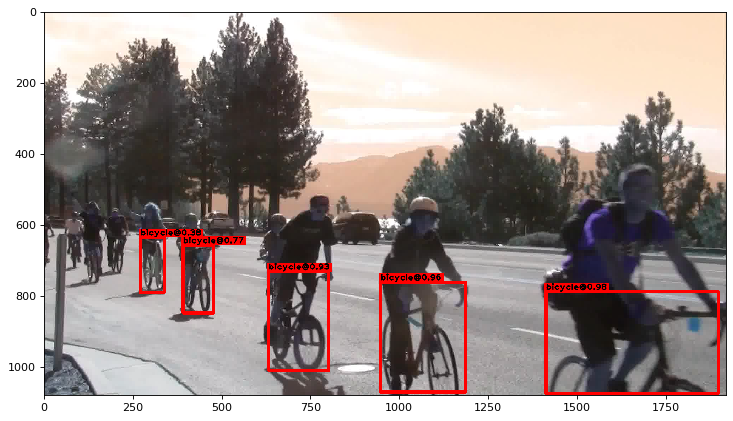

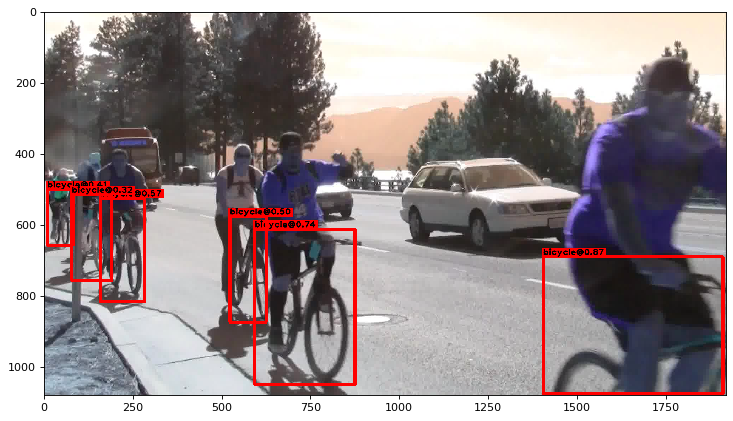

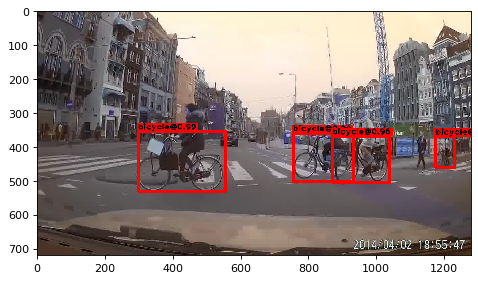

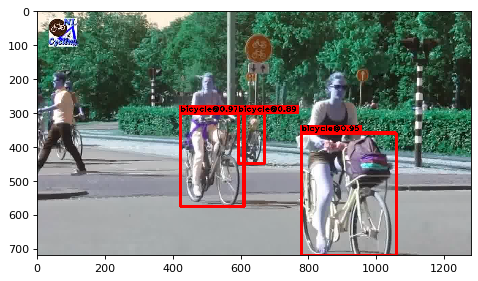

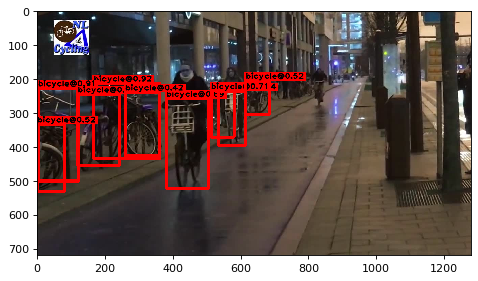

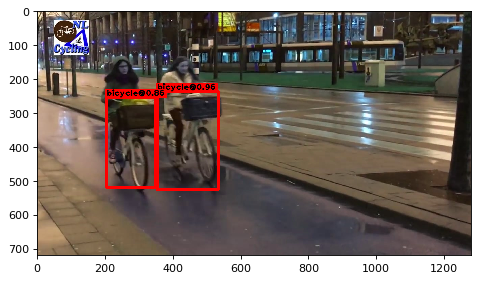

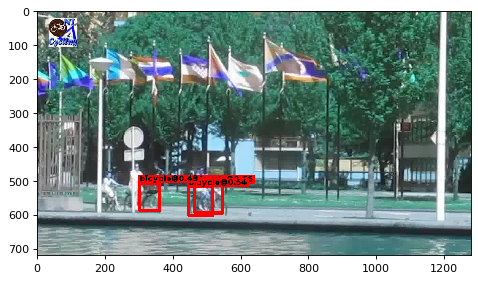

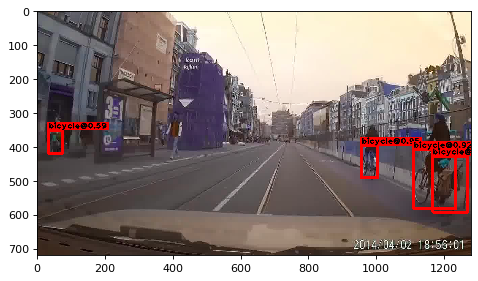

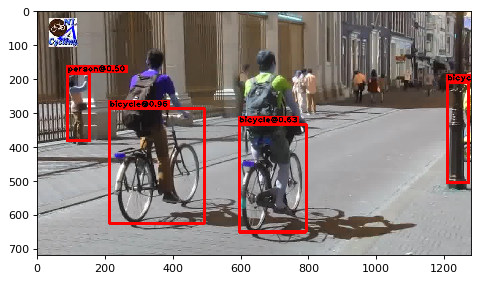

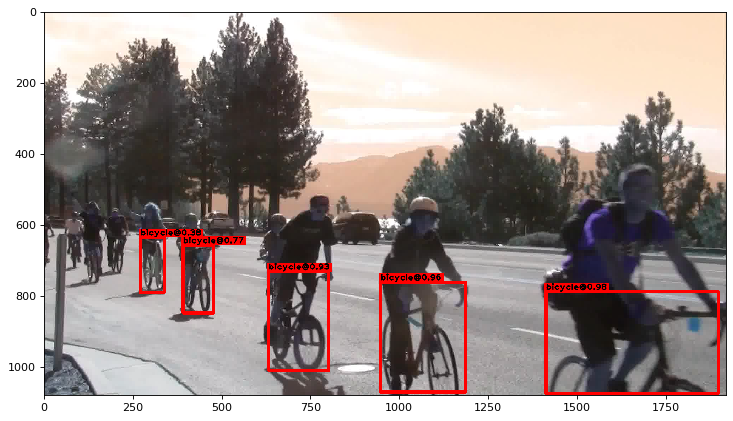

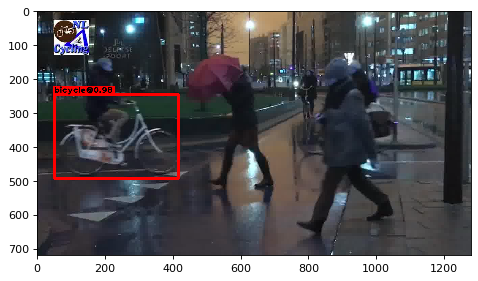

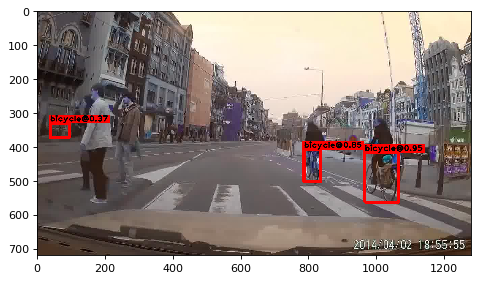

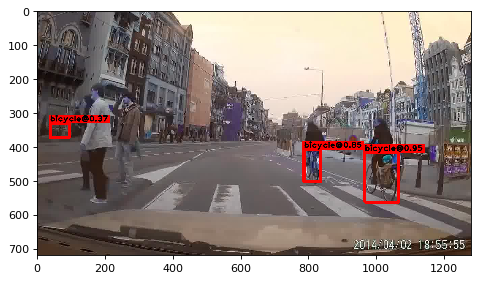

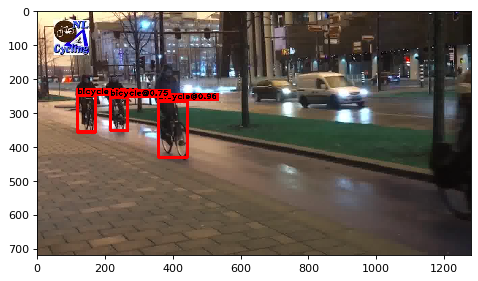

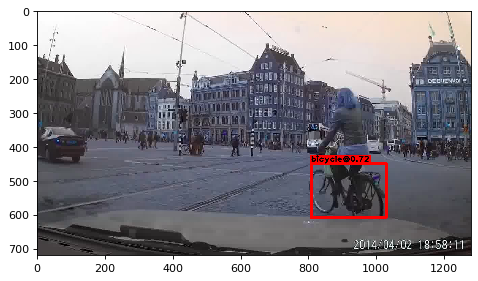

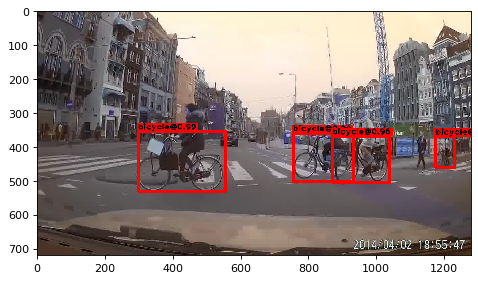

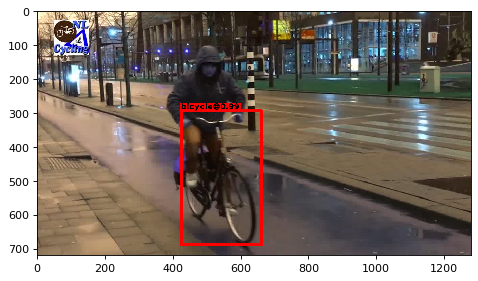

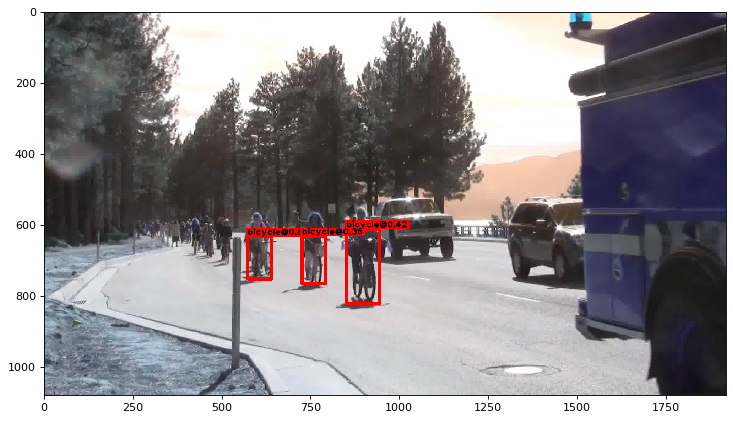

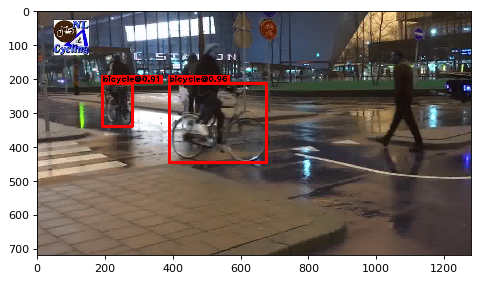

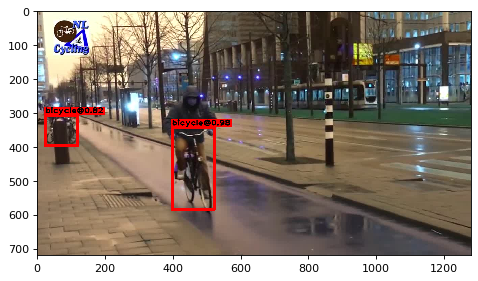

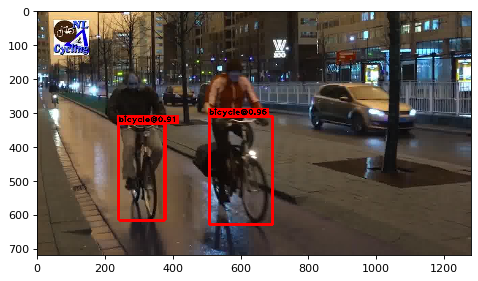

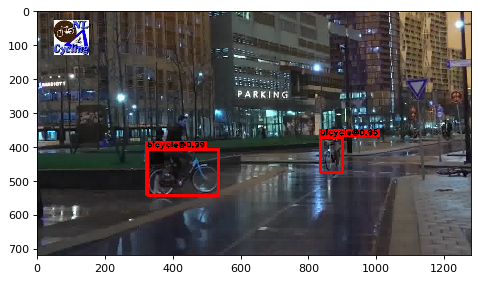

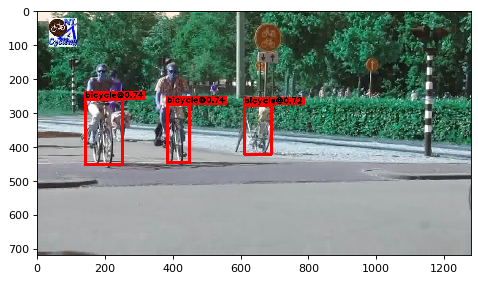

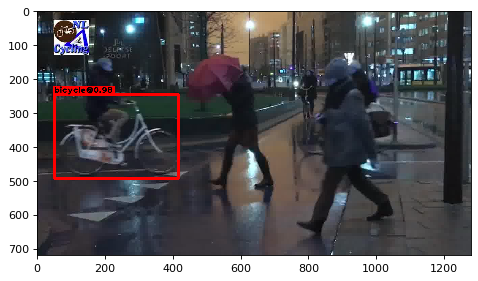

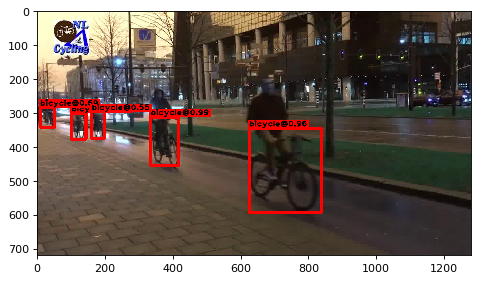

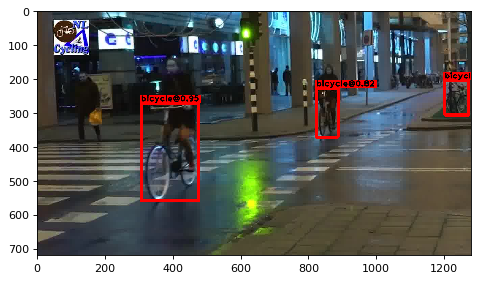

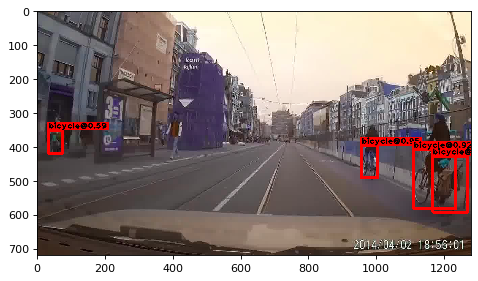

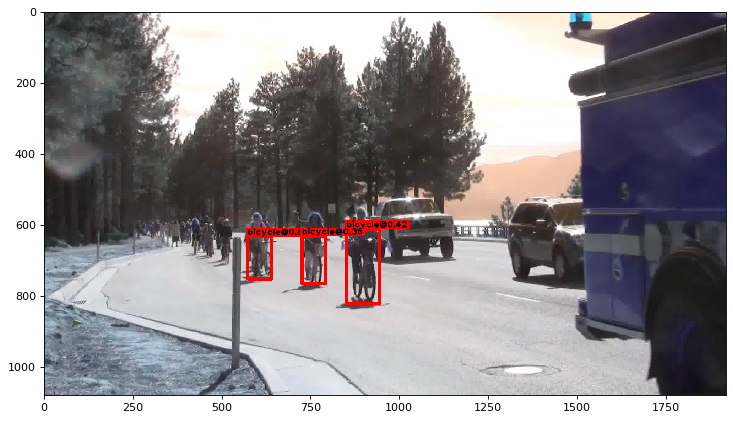

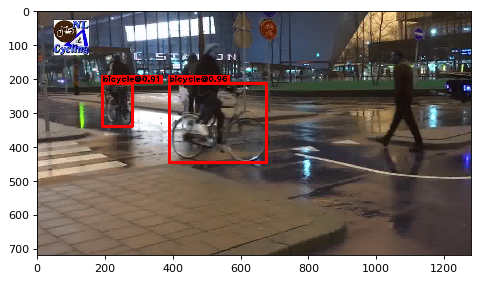

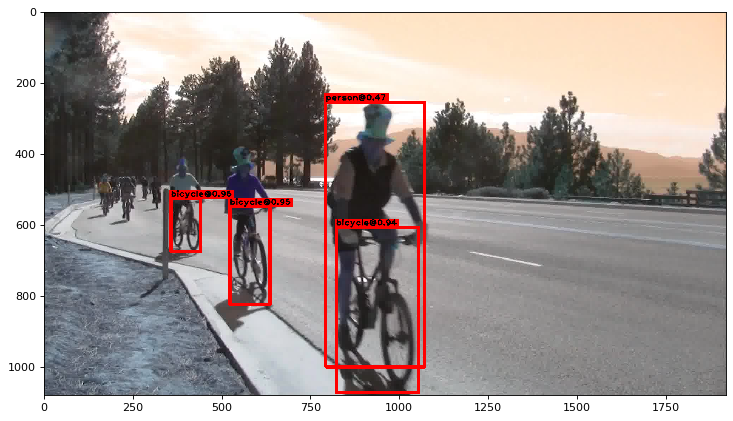

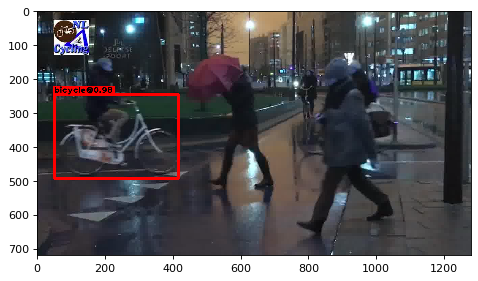

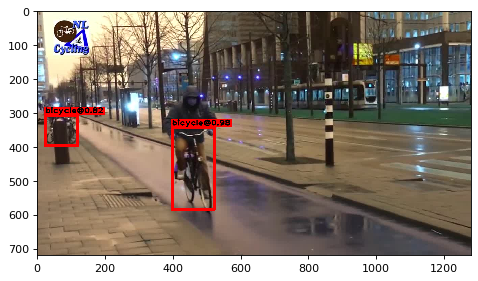

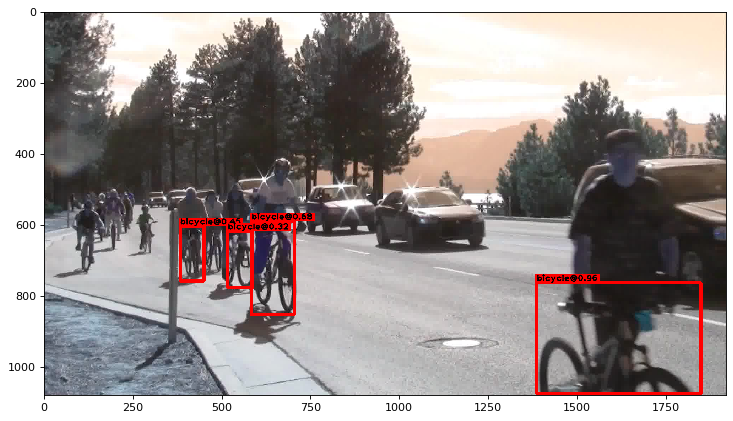

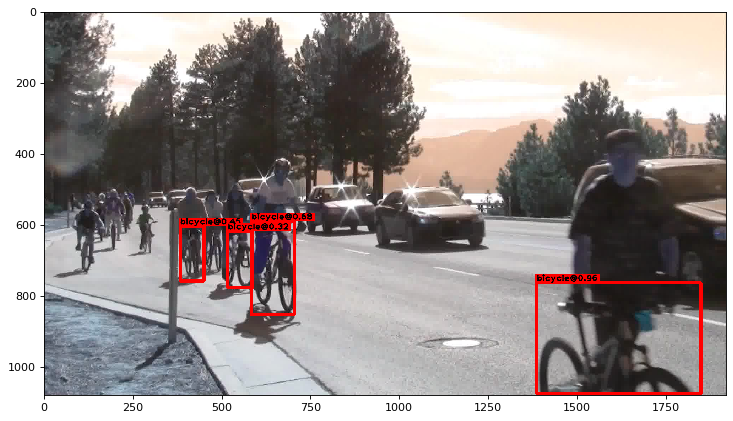

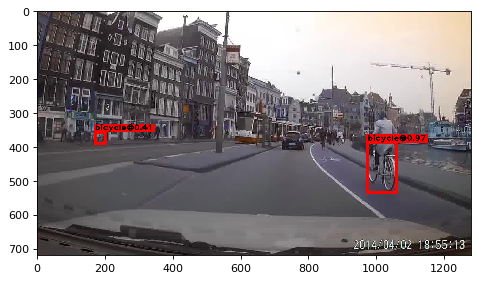

In [ ]:
import os
import glob
import json
import boto3
import sagemaker
import cv2

# for displaying images at jupyter notebooks
from matplotlib import pyplot as plt

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)

def drawBB(
    image, header, x, y, xmax, ymax, color=(255, 0, 0), thickness=4*2, text_thickness=1*2,
    text_size=0.8*2, font=cv2.FONT_HERSHEY_PLAIN, footer=""
):
    # bounding box
    cv2.rectangle(image, (x, y), (xmax, ymax), color, thickness)
    
    # header text
    if header != '':
        (text_width, text_height) = cv2.getTextSize(header, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            (max(0, int(x-(thickness/2))), max(0, int(y-5-text_height-(thickness/2)))),
            (int(x+text_width+(thickness/2)), int(y)),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, header, (max(0, x), max(0, y-5)), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)
        
    if footer != "":
        (footer_width, footer_height) = cv2.getTextSize(footer, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            ( int(x-(thickness/2)), int(ymax+(thickness/2)) ),
            ( int(x+footer_width+(thickness/2)), int(ymax+footer_height+(thickness/2)) ),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, footer, ( x, int(ymax+12+(thickness/2)) ), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)

# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))
    
    # parse response to json
    response = json.loads(result['Body'].read().decode())
    img = cv2.imread(fpath, 1)
    (height, width, channels) = img.shape
    
    try:
        for det in response['input.jpg']['detections']:
            xmin = det['det_bbox'][0] * width
            ymin = det['det_bbox'][1] * height
            xmax = det['det_bbox'][2] * width
            ymax = det['det_bbox'][3] * height
            
            drawBB(img, '{}@{:.2f}'.format(det['label'], det['confidence']), int(xmin), int(ymin), int(xmax), int(ymax))
    # skip when there's no detections
    except:
        pass
    
    # show image in jupyter
    fig, ax = plt.subplots(figsize=(int(1.05 * height / 100), int(1.05 * width / 100)), dpi=80)
    ax.imshow(img, interpolation='nearest')
    plt.show()
    plt.close()
    
    # ..or just save to disk
    # cv2.imwrite('/path/to/output.jpg', img)
    